In [1]:
import tensorflow as tf
import numpy as np

from sklearn.utils import shuffle

import matplotlib.pyplot as plt
%matplotlib inline

**Start an interactive session**

In [2]:
tf.InteractiveSession()

**Some basic convolutional neural network operations**

In [3]:
# Start with loading MNIST Dataset
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("data/mnist", one_hot=True)
n_input = 28*28                    # MNIST image feature size

# Let's pick the first several data points for illustration
batch_size = 128
X_train, y_train = mnist.train.next_batch(batch_size) # get 64 data points
X_valid, y_valid = mnist.train.next_batch(500) # get 64 data points

Extracting data/mnist\train-images-idx3-ubyte.gz
Extracting data/mnist\train-labels-idx1-ubyte.gz
Extracting data/mnist\t10k-images-idx3-ubyte.gz
Extracting data/mnist\t10k-labels-idx1-ubyte.gz


Image is digit 8


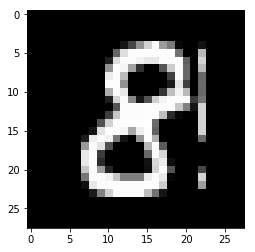

In [4]:
indx = 9
print("Image is digit {}".format(np.argwhere(y_train[indx]==1).flatten()[0]))
plt.imshow(X_train[indx].reshape(28,28), cmap='gray')

In [5]:
# Define placeholders for the input
# tensor shape as (?, 784), set the first dimension to be unknown, 
# as in actual training, batch size is sometimes unknown until runtime
x = tf.placeholder(tf.float32, [None, n_input]) 
y = tf.placeholder(tf.int32, (None))


In [6]:
from tensorflow.contrib.layers import flatten

def my_conv_model(x):
    mu = 0
    sigma = 0.1
    
    # reshape to an image
    x_reshape = tf.reshape(x, shape=[-1, 28, 28, 1])    
    
    # layer 1: convolution, input 28x28x1 output: 28x28x6
    conv1_W = tf.Variable(tf.random_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x_reshape, conv1_W, strides=[1, 1, 1, 1], padding='SAME') + conv1_b
    
    # activation
    conv1 = tf.nn.relu(conv1)
    
    # Pooling. Input = 28x28x6. Output = 14x14x6
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    # Flatten. Input: 14x14x6 output = 1176
    fc0   = flatten(conv1)
    
    # Layer 2: Fully connected. Input: 1176, output: 10
    fc1_W = tf.Variable(tf.random_normal(shape=(1176, 10), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(10))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    logits = tf.matmul(fc0, fc1_W) + fc1_b
    return logits

In [7]:
x = tf.placeholder(tf.float32, [None, n_input]) 
x_reshape = tf.reshape(x, shape=[-1, 28, 28, 1]) # reshape to (?, 28, 28, 1)
y = tf.placeholder(tf.int32, (None, 10))
#one_hot_y = tf.one_hot(y, 10) # 10 classes

In [8]:
rate = 0.001

logits = my_conv_model(x_reshape)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [9]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [10]:
EPOCHS=3
BATCHES_PER_EPOCH=100
BATCH_SIZE=128

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        for _ in range(BATCHES_PER_EPOCH):
            batch_x, batch_y = mnist.train.next_batch(batch_size)        
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(X_valid, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    print("Complete")

Training...

EPOCH 1 ...
Validation Accuracy = 0.864

EPOCH 2 ...
Validation Accuracy = 0.890

EPOCH 3 ...
Validation Accuracy = 0.920

Complete
